In [98]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load the dataset
df = pd.read_csv('hate_crime.csv')
print(df)

        incident_id  data_year        ori    pug_agency_name pub_agency_unit  \
0                43       1991  AR0350100         Pine Bluff             NaN   
1                44       1991  AR0350100         Pine Bluff             NaN   
2                45       1991  AR0600300  North Little Rock             NaN   
3                46       1991  AR0600300  North Little Rock             NaN   
4                47       1991  AR0670000             Sevier             NaN   
...             ...        ...        ...                ...             ...   
253771      1513747       2023  WY0190100        Green River             NaN   
253772      1517229       2023  WY0130100             Casper             NaN   
253773      1517231       2023  WY0110100           Cheyenne             NaN   
253774      1519468       2023  WY0150000               Park             NaN   
253775      1519469       2023  WY0110100           Cheyenne             NaN   

       agency_type_name state_abbr stat

In [68]:
df.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
0,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
1,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
2,45,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,2,Aggravated Assault;Murder and Nonnegligent Man...,2.0,Residence/Home,Anti-White,Individual,M,S
3,46,1991,AR0600300,North Little Rock,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,Not Specified,1,Intimidation,1.0,Residence/Home,Anti-White,Individual,S,S
4,47,1991,AR0670000,Sevier,NaN,County,AR,Arkansas,West South Central,South,...,White,Not Specified,1,Intimidation,1.0,School/College,Anti-Black or African American,Individual,S,S


In [69]:
# Check column names to confirm the year column name
print(df.columns)

# Filter the dataset for years between 2013 and 2023
data= df[(df['data_year'] >= 2013) & (df['data_year'] <= 2023)]
print(data)


Index(['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit',
       'agency_type_name', 'state_abbr', 'state_name', 'division_name',
       'region_name', 'population_group_code', 'population_group_description',
       'incident_date', 'adult_victim_count', 'juvenile_victim_count',
       'total_offender_count', 'adult_offender_count',
       'juvenile_offender_count', 'offender_race', 'offender_ethnicity',
       'victim_count', 'offense_name', 'total_individual_victims',
       'location_name', 'bias_desc', 'victim_types', 'multiple_offense',
       'multiple_bias'],
      dtype='object')
        incident_id  data_year        ori pug_agency_name pub_agency_unit  \
163054       169133       2013  AK0010100       Anchorage             NaN   
163055       169134       2013  AK0010100       Anchorage             NaN   
163056       169135       2013  AK0010100       Anchorage             NaN   
163057       169136       2013  AK0010100       Anchorage             NaN  

In [70]:
data.head()

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
163054,169133,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,Unknown,Not Specified,1,Aggravated Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
163055,169134,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Intimidation,2.0,Highway/Road/Alley/Street/Sidewalk,Anti-American Indian or Alaska Native,Individual,S,S
163056,169135,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Burglary/Breaking & Entering,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
163057,169136,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
163058,169137,2013,AK0010100,Anchorage,NaN,City,AK,Alaska,Pacific,West,...,White,Not Specified,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S


In [71]:
#concise summary of dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 90722 entries, 163054 to 253775
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   incident_id                   90722 non-null  int64  
 1   data_year                     90722 non-null  int64  
 2   ori                           90722 non-null  object 
 3   pug_agency_name               90722 non-null  object 
 4   pub_agency_unit               3325 non-null   object 
 5   agency_type_name              90722 non-null  object 
 6   state_abbr                    90722 non-null  object 
 7   state_name                    90722 non-null  object 
 8   division_name                 90722 non-null  object 
 9   region_name                   90722 non-null  object 
 10  population_group_code         90055 non-null  object 
 11  population_group_description  90055 non-null  object 
 12  incident_date                 90722 non-null  object 
 13  

In [72]:
#summary of statistics pertaining to the DataFrame columns
data.describe()

,incident_id,data_year,adult_victim_count,juvenile_victim_count,total_offender_count,adult_offender_count,juvenile_offender_count,victim_count,total_individual_victims
count,9.072200e+04,90722.000000,76401.000000,73764.000000,90722.000000,66919.000000,66912.000000,90722.000000,85598.000000
mean,9.850001e+05,2018.850698,0.811233,0.116371,0.892011,0.681735,0.140931,0.981669,1.044522
std,5.975892e+05,3.134821,1.111715,0.519577,0.918794,0.821274,0.554040,0.318596,1.202721
min,1.630960e+05,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.858142e+05,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,1.447360e+06,2019.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.475754e+06,2022.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.522894e+06,2023.000000,146.000000,60.000000,60.000000,60.000000,20.000000,5.000000,146.000000


In [73]:
print ("Number of rows in the dataset  : " ,data.shape[0])
print ("Number of Columns in the dataset : " ,data.shape[1])
print ("Number of Features : \n" ,data.columns.tolist(), "\n")
print ("Unique values :  \n",data.nunique())

Number of rows in the dataset  :  90722
Number of Columns in the dataset :  28
Number of Features : 
 ['incident_id', 'data_year', 'ori', 'pug_agency_name', 'pub_agency_unit', 'agency_type_name', 'state_abbr', 'state_name', 'division_name', 'region_name', 'population_group_code', 'population_group_description', 'incident_date', 'adult_victim_count', 'juvenile_victim_count', 'total_offender_count', 'adult_offender_count', 'juvenile_offender_count', 'offender_race', 'offender_ethnicity', 'victim_count', 'offense_name', 'total_individual_victims', 'location_name', 'bias_desc', 'victim_types', 'multiple_offense', 'multiple_bias'] 

Unique values :  
 incident_id                     90722
data_year                          11
ori                              8110
pug_agency_name                  5574
pub_agency_unit                   561
agency_type_name                    8
state_abbr                         53
state_name                         53
division_name                      11
reg

In [74]:
# geting to know which year has more accident
data.value_counts('data_year')

,count
data_year,
2023,11858
2022,11766
2021,11014
2020,9958
2019,7869
2017,7327
2018,7176
2016,6270
2013,6044


In [75]:
data.duplicated().sum()  # Check for duplicate rows
data.isnull().sum()  # Count missing values in each column

,0
incident_id,0
data_year,0
ori,0
pug_agency_name,0
pub_agency_unit,87397
agency_type_name,0
state_abbr,0
state_name,0
division_name,0
region_name,0


In [76]:
data = data.copy()
data['offender_race'].fillna('Unknown', inplace=True)
data['offender_race'].isnull().sum()  # Verify no missing values remain


np.int64(0)

In [77]:
columns_for_removal = ['offender_ethnicity','total_individual_victims', 'adult_offender_count',
                       'juvenile_offender_count', 'adult_victim_count',
                       'juvenile_victim_count','division_name', 'multiple_offense', 'multiple_bias', 'ori','pub_agency_unit']
# data = data.copy() # No need to create a copy if you're not using the original later

# Remove inplace=True and assign the result back to data or cleaned
cleaned = data.drop(columns_for_removal, axis=1)
cleaned.head() # Now cleaned should be a DataFrame and have a head() method

,incident_id,data_year,pug_agency_name,agency_type_name,state_abbr,state_name,region_name,population_group_code,population_group_description,incident_date,total_offender_count,offender_race,victim_count,offense_name,location_name,bias_desc,victim_types
163054,169133,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-02-15,1,Unknown,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163055,169134,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-03-01,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-American Indian or Alaska Native,Individual
163056,169135,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-07,4,White,1,Burglary/Breaking & Entering,Residence/Home,Anti-Black or African American,Individual
163057,169136,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-17,1,White,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163058,169137,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-20,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual


In [48]:
data.loc[:, 'incident_date'] = pd.to_datetime(data['incident_date'])


In [78]:
new_names = {
    'incident_id': 'INCIDENT_ID', 'data_year': 'DATA_YEAR',
    'pub_agency_name': 'PUB_AGENCY_NAME', 'pug_agency_name': 'PUG_AGENCY_NAME',
    'agency_type_name': 'AGENCY_TYPE_NAME', 'state_abbr': 'STATE_ABBR',
    'state_name': 'STATE_NAME', 'region_name': 'REGION_NAME',
    'population_group_code': 'POPULATION_GROUP_CODE',
    'population_group_description': 'POPULATION_GROUP_DESC',
    'incident_date': 'INCIDENT_DATE', 'total_offender_count': 'TOTAL_OFFENDER_COUNT',
    'offender_race': 'OFFENDER_RACE', 'victim_count': 'VICTIM_COUNT',
    'offense_type': 'OFFENSE_NAME', 'offense_name': 'OFFENSE_NAME',
    'location_type': 'LOCATION_NAME', 'location_name': 'LOCATION_NAME',
    'bias_desc': 'BIAS_DESC', 'bias_disc': 'BIAS_DESC',
    'victim_types': 'VICTIM_TYPES'
}

cleaned.rename(columns=new_names, inplace=True)
cleaned.head()

,INCIDENT_ID,DATA_YEAR,PUG_AGENCY_NAME,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,REGION_NAME,POPULATION_GROUP_CODE,POPULATION_GROUP_DESC,INCIDENT_DATE,TOTAL_OFFENDER_COUNT,OFFENDER_RACE,VICTIM_COUNT,OFFENSE_NAME,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES
163054,169133,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-02-15,1,Unknown,1,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163055,169134,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-03-01,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-American Indian or Alaska Native,Individual
163056,169135,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-07,4,White,1,Burglary/Breaking & Entering,Residence/Home,Anti-Black or African American,Individual
163057,169136,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-17,1,White,1,Simple Assault,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual
163058,169137,2013,Anchorage,City,AK,Alaska,West,1C,"Cities from 250,000 thru 499,999",2013-06-20,1,White,1,Intimidation,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual


In [79]:
# Group by year and count unique bias descriptions
bias_types_by_year = cleaned.groupby('DATA_YEAR')['BIAS_DESC'].nunique().reset_index()

# Rename columns for clarity
bias_types_by_year.columns = ['Year', 'Unique_Bias_Types']

# Display the table
print(bias_types_by_year)


    Year  Unique_Bias_Types
0   2013                 32
1   2014                 40
2   2015                 40
3   2016                 73
4   2017                 79
5   2018                 69
6   2019                156
7   2020                172
8   2021                147
9   2022                176
10  2023                175


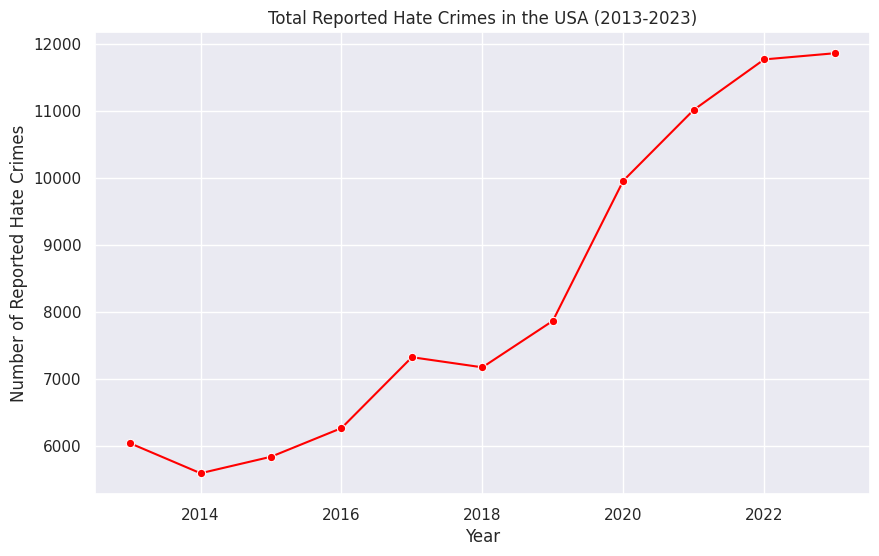

In [80]:
# Count total bias-related incidents by year
bias_counts_by_year = cleaned.groupby('DATA_YEAR')['BIAS_DESC'].count().reset_index()
bias_counts_by_year.columns = ['Year', 'Total_Hate_Crimes']

# Plotting
plt.figure(figsize=(10,6))
sns.set_style('darkgrid')
sns.lineplot(data=bias_counts_by_year, x='Year', y='Total_Hate_Crimes', color='red', marker='o')
plt.title("Total Reported Hate Crimes in the USA (2013-2023)")
plt.xlabel("Year")
plt.ylabel("Number of Reported Hate Crimes")
plt.show()


In [81]:
# different types of hate crimes in 2013-2023
cleaned['OFFENSE_NAME'].value_counts().head(10)

,count
OFFENSE_NAME,
Intimidation,24709
Destruction/Damage/Vandalism of Property,23812
Simple Assault,19406
Aggravated Assault,9405
All Other Larceny,1813
Robbery,1421
Burglary/Breaking & Entering,1228
Drug/Narcotic Violations,874
Destruction/Damage/Vandalism of Property;Intimidation,589


In [82]:
# percentage proportion
cleaned['OFFENSE_NAME'].value_counts().head(10)/len(cleaned['OFFENSE_NAME'])

,count
OFFENSE_NAME,
Intimidation,0.272360
Destruction/Damage/Vandalism of Property,0.262472
Simple Assault,0.213906
Aggravated Assault,0.103668
All Other Larceny,0.019984
Robbery,0.015663
Burglary/Breaking & Entering,0.013536
Drug/Narcotic Violations,0.009634
Destruction/Damage/Vandalism of Property;Intimidation,0.006492


In [83]:
# top four crime categories funtion
top_four = ['Destruction/Damage/Vandalism of Property','Intimidation','Simple Assault','Aggravated Assault']
def crime_check(crime):
    if crime in top_four:
        return crime
    else:
        return 'Robbery/B&E/Other'

In [84]:
# creating a dataframe for the same function
most_common_hate_crimes = cleaned
most_common_hate_crimes['OFFENSE_NAME'] = most_common_hate_crimes['OFFENSE_NAME'].apply(crime_check)

In [85]:
most_common_hate_crimes['OFFENSE_NAME'].value_counts()

,count
OFFENSE_NAME,
Intimidation,24709
Destruction/Damage/Vandalism of Property,23812
Simple Assault,19406
Robbery/B&E/Other,13390
Aggravated Assault,9405


In [86]:
# now aggregating the anti-lesbian, gay, bisexual, transgender, anti-gay(male), anti-lesbian(female) columns into one anti-LGBT
# for ease as prejudice
lgbt_BIAS_DESC = ['Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 'Anti-Gay (Male)', 'Anti-Lesbian (Female)']
def anti_lgbt_BIAS_DESC(BIAS_DESC):
    if BIAS_DESC in lgbt_BIAS_DESC:
        return "Anti-LGBT"
    else:
        return BIAS_DESC

In [87]:
most_common_hate_crimes['BIAS_DESC'] = most_common_hate_crimes['BIAS_DESC'].apply(anti_lgbt_BIAS_DESC)

In [88]:
most_common_hate_crimes['BIAS_DESC'].value_counts()

,count
BIAS_DESC,
Anti-Black or African American,26574
Anti-LGBT,14612
Anti-Jewish,10136
Anti-White,8766
Anti-Hispanic or Latino,5637
...,...
Anti-Female;Anti-Other Christian,1
Anti-American Indian or Alaska Native;Anti-Black or African American;Anti-Female;Anti-Hispanic or Latino,1
Anti-Asian;Anti-Bisexual,1


Text(0.5, 1.0, 'Total Hate Crimes per Offense Name (2013-2023)')

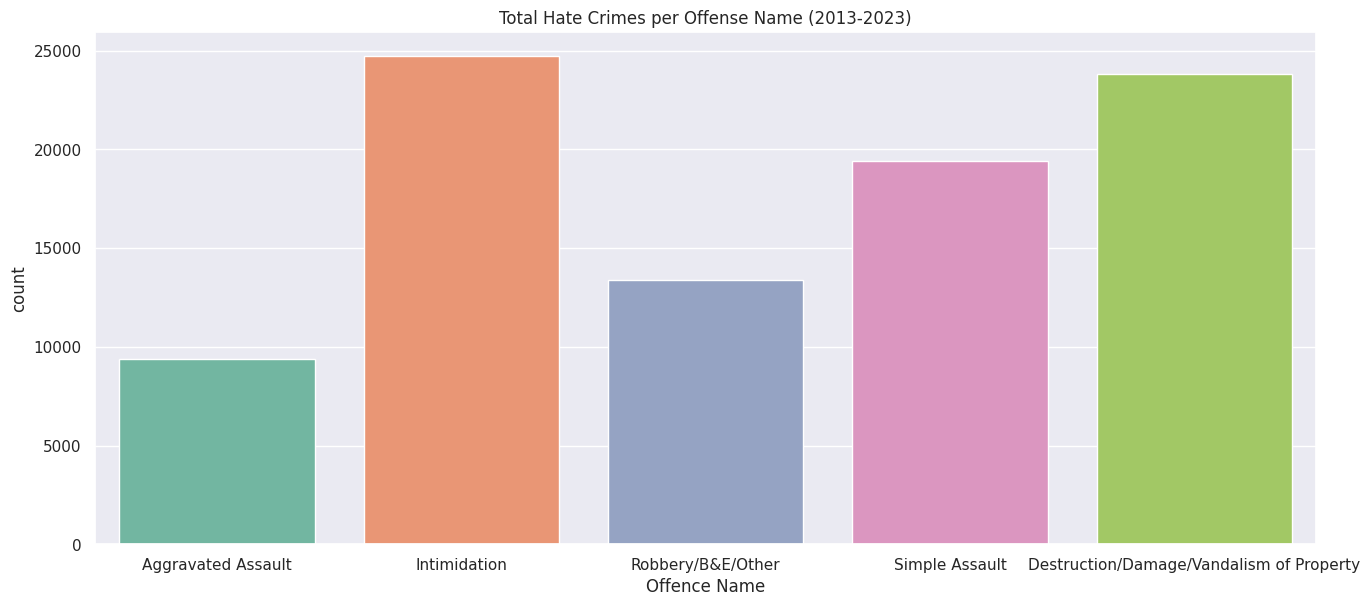

In [89]:
# total crime per offence as divided by categories
plt.figure(figsize=(14,6))
sns.countplot(data=cleaned, x='OFFENSE_NAME', palette='Set2') # Changed 'cleaned=' to 'data='
plt.tight_layout()
plt.xlabel('Offence Name')
plt.title('Total Hate Crimes per Offense Name (2013-2023)')

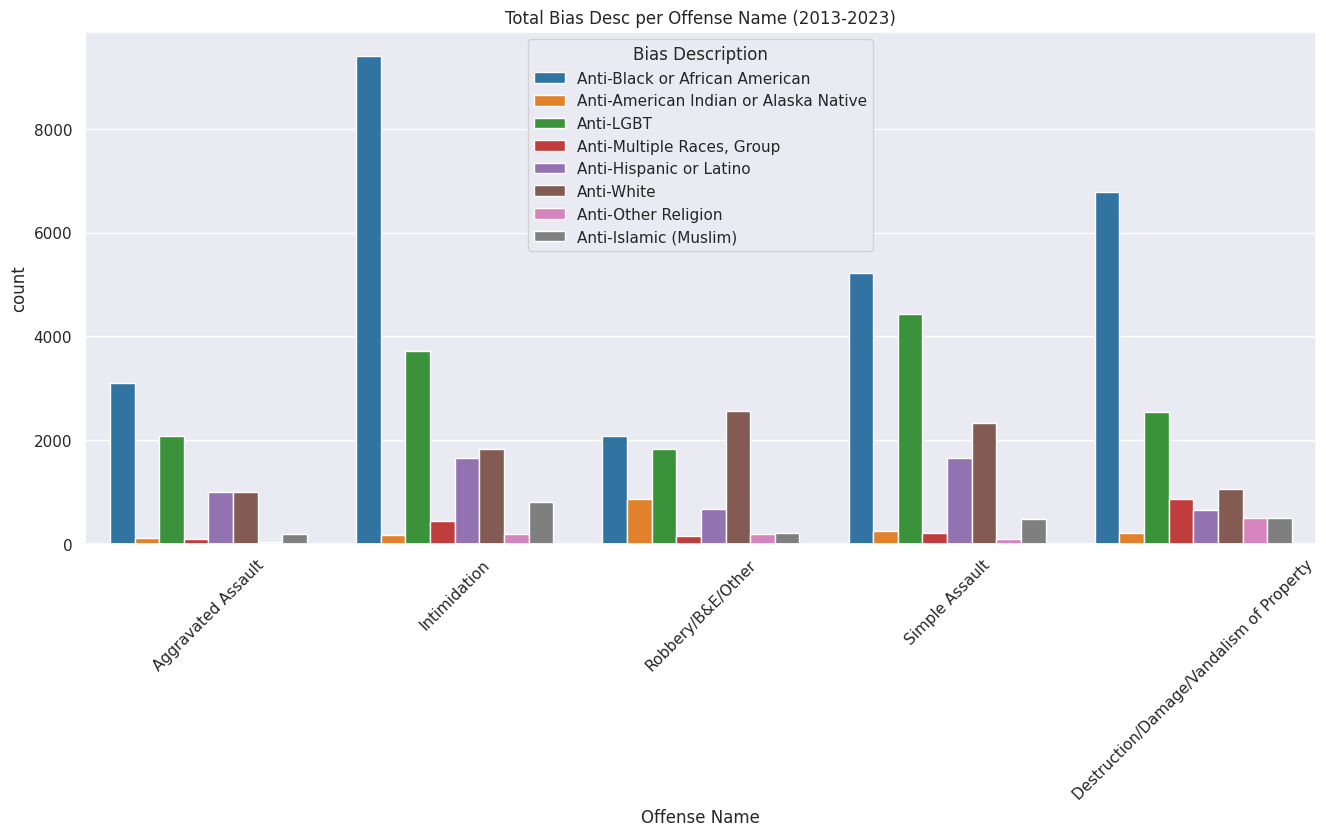

In [97]:
#visualization of bias desc per offence name
plt.figure(figsize=(14,6))


# first 8 unique bias descriptions
top_8_bias_desc = cleaned['BIAS_DESC'].unique()[:8]

# Filter dataset
filtered_data = cleaned[cleaned['BIAS_DESC'].isin(top_8_bias_desc)]

# Create the bar chart
sns.countplot(data=filtered_data, x='OFFENSE_NAME', hue='BIAS_DESC')

plt.tight_layout()
plt.title("Total Bias Desc per Offense Name (2013-2023)")
plt.xlabel("Offense Name")
plt.xticks(rotation=45)
plt.legend(title="Bias Description")

plt.show()

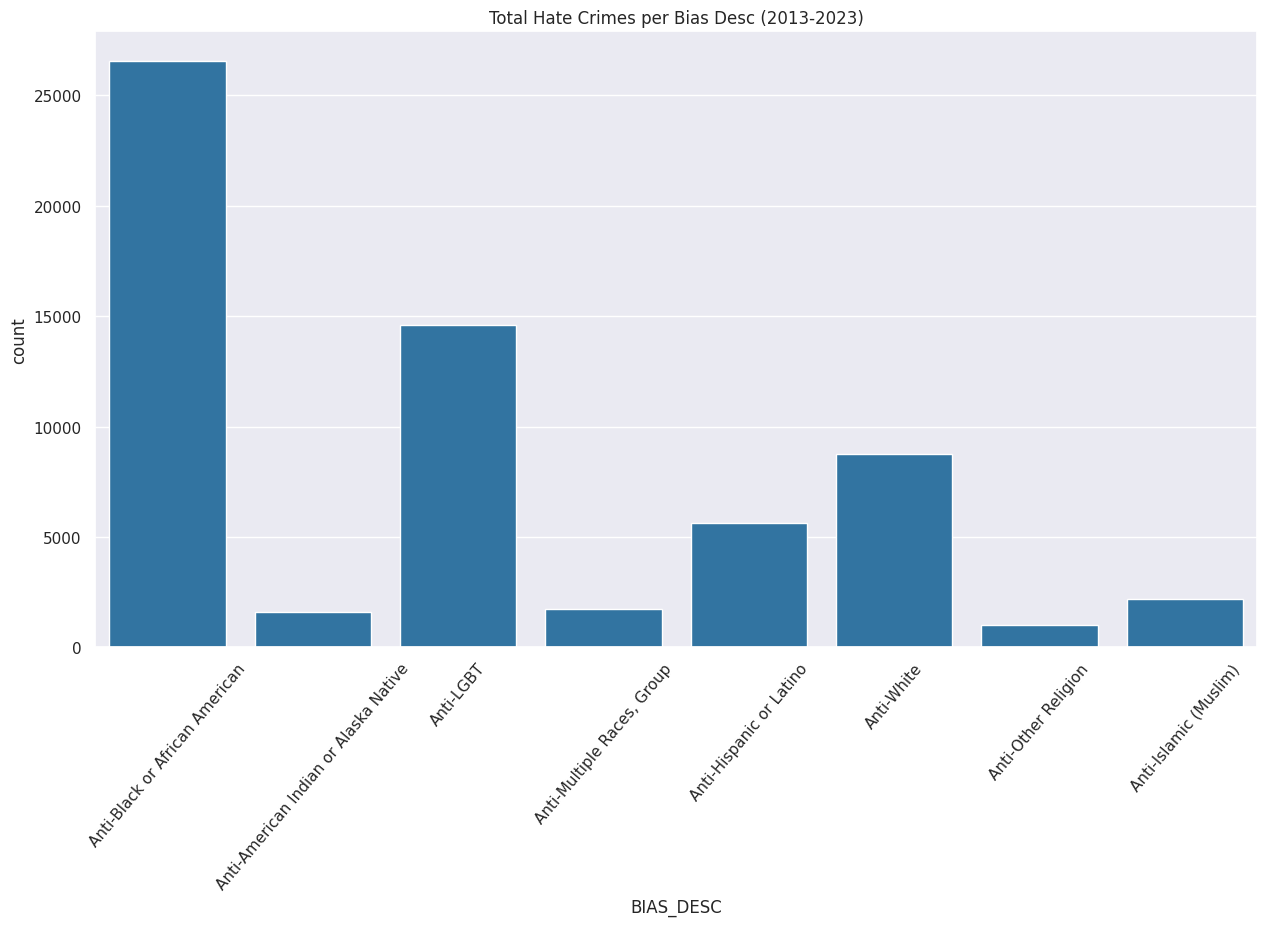

In [96]:
# Hate crime per bias desc
plt.figure(figsize=(15,8))
sns.set_context('notebook', font_scale=1)

# first 8 unique bias desc
top_8_bias_desc = cleaned['BIAS_DESC'].unique()[:8]

# only rows with these 8 bias descriptions
filtered_data = cleaned[cleaned['BIAS_DESC'].isin(top_8_bias_desc)]

# Plotting
sns.countplot(data=filtered_data, x='BIAS_DESC')

plt.xticks(rotation=50)
plt.title("Total Hate Crimes per Bias Desc (2013-2023)")
plt.xlabel("BIAS_DESC")

plt.show()


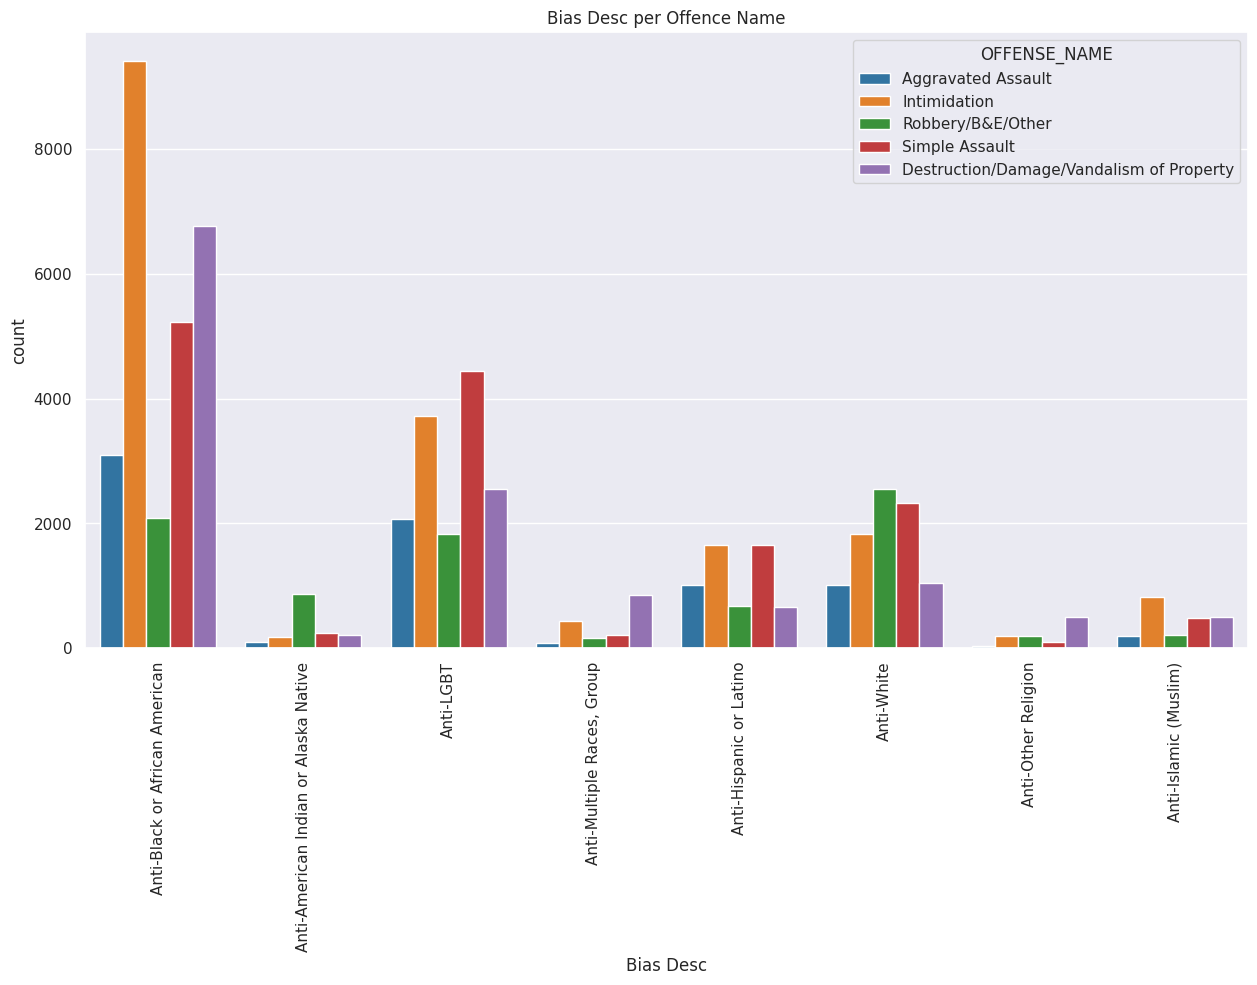

In [95]:
#bar chart of bias desc per offence name
plt.figure(figsize=(15,8))
sns.set_context('notebook', font_scale=1)

# Get the first 8 unique bias descriptions
top_8_bias_desc = cleaned['BIAS_DESC'].unique()[:8]

# Filter dataset to include only rows with these 8 bias descriptions
filtered_data = cleaned[cleaned['BIAS_DESC'].isin(top_8_bias_desc)]

# Plot with filtered data
sns.countplot(data=filtered_data, x='BIAS_DESC', hue='OFFENSE_NAME')

plt.xticks(rotation=90)  # Rotate labels for readability
plt.title("Bias Desc per Offence Name")
plt.xlabel("Bias Desc")

plt.show()


Top 10 locations with the highest hate crime counts:
LOCATION_NAME
Residence/Home                        25372
Highway/Road/Alley/Street/Sidewalk    15895
Other/Unknown                          9391
Parking/Drop Lot/Garage                5120
School-Elementary/Secondary            4562
Church/Synagogue/Temple/Mosque         3423
Restaurant                             2350
Park/Playground                        2282
School-College/University              2221
Commercial/Office Building             1877
Name: count, dtype: int64


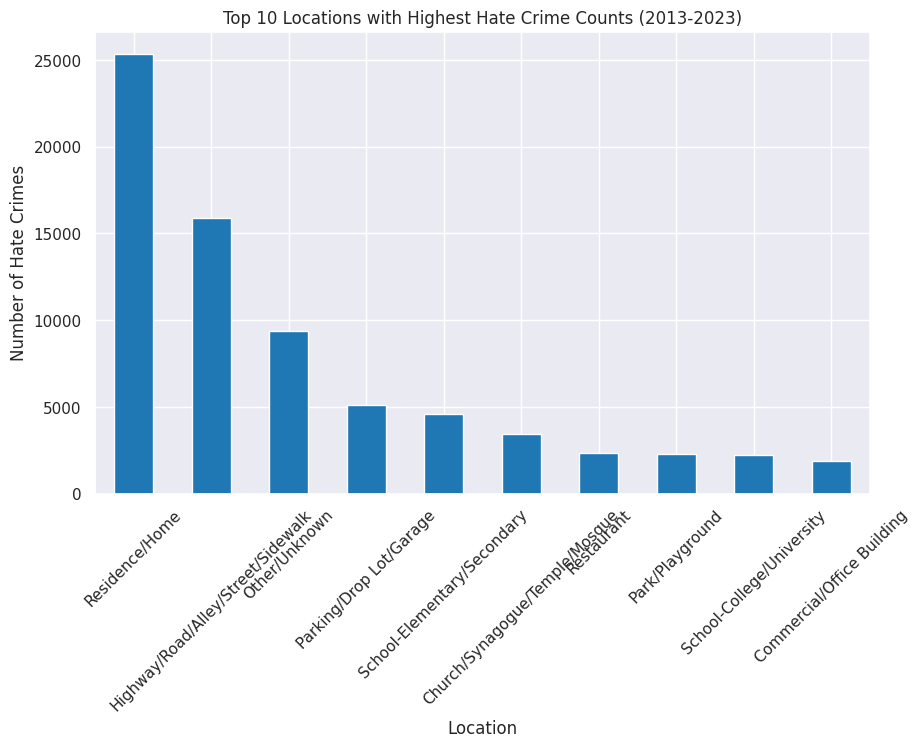

In [94]:
# Select columns
columns_to_use = ['LOCATION_NAME', 'BIAS_DESC']
data_filtered = cleaned[columns_to_use].dropna()

#top 10 locations with the highest total hate crime counts
top_10_locations = (
    data_filtered['LOCATION_NAME']
    .value_counts()
    .head(10)
)

print("Top 10 locations with the highest hate crime counts:")
print(top_10_locations)

# bar graph top 10 locations
plt.figure(figsize=(10, 6))
top_10_locations.plot(kind='bar')
plt.title('Top 10 Locations with Highest Hate Crime Counts (2013-2023)')
plt.xlabel('Location')
plt.ylabel('Number of Hate Crimes')
plt.xticks(rotation=45)
plt.show()


# DECISION TREE

Accuracy: 0.52

Classification Report:

                                    precision    recall  f1-score   support

Highway/Road/Alley/Street/Sidewalk       0.42      0.27      0.33      3102
                    Residence/Home       0.71      0.55      0.62      1848
           Parking/Drop Lot/Garage       0.67      0.00      0.00      1066
                     Other/Unknown       0.51      0.84      0.64      5128
       School-Elementary/Secondary       0.52      0.10      0.17       924

                          accuracy                           0.52     12068
                         macro avg       0.57      0.35      0.35     12068
                      weighted avg       0.53      0.52      0.46     12068



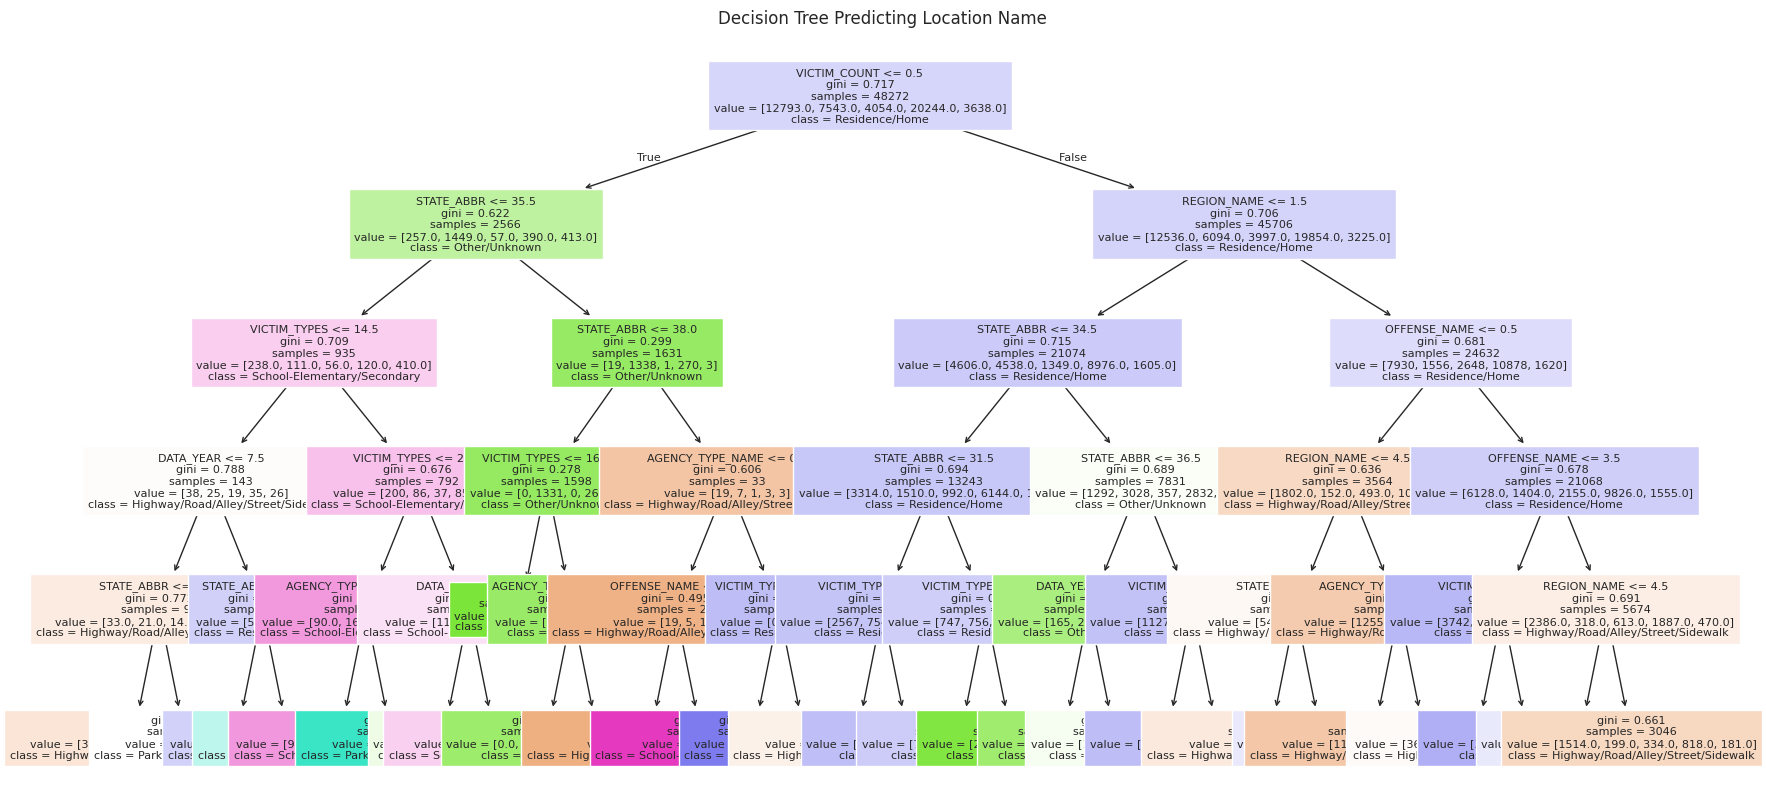

In [63]:
# target
target_col = 'LOCATION_NAME'

# top 5 location names
top_locations = cleaned[target_col].value_counts().nlargest(5).index
cleaned = cleaned[cleaned[target_col].isin(top_locations)]

# Define feature
X = cleaned[['OFFENSE_NAME', 'REGION_NAME', 'DATA_YEAR', 'AGENCY_TYPE_NAME',
             'VICTIM_TYPES', 'OFFENDER_RACE', 'STATE_ABBR', 'VICTIM_COUNT']]  # Updated column names
y = cleaned[target_col]

# Drop rows with missing values
cleaned = cleaned[X.columns.tolist() + [target_col]].dropna()

# Label encode all categorical variables
X_encoded = X.apply(LabelEncoder().fit_transform)
y_encoded = LabelEncoder().fit_transform(y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train the model
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=pd.Series(y).unique()))

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=LabelEncoder().fit(y).classes_, fontsize=8)
plt.title("Decision Tree Predicting Location Name")
plt.show()

# RANDOM FOREST

Random Forest Accuracy: 0.56

Classification Report:

              precision    recall  f1-score   support

           0       0.51      0.40      0.45      3102
           1       0.76      0.55      0.64      1848
           2       0.50      0.00      0.01      1066
           3       0.53      0.83      0.65      5128
           4       0.56      0.22      0.31       924

    accuracy                           0.56     12068
   macro avg       0.57      0.40      0.41     12068
weighted avg       0.56      0.56      0.51     12068



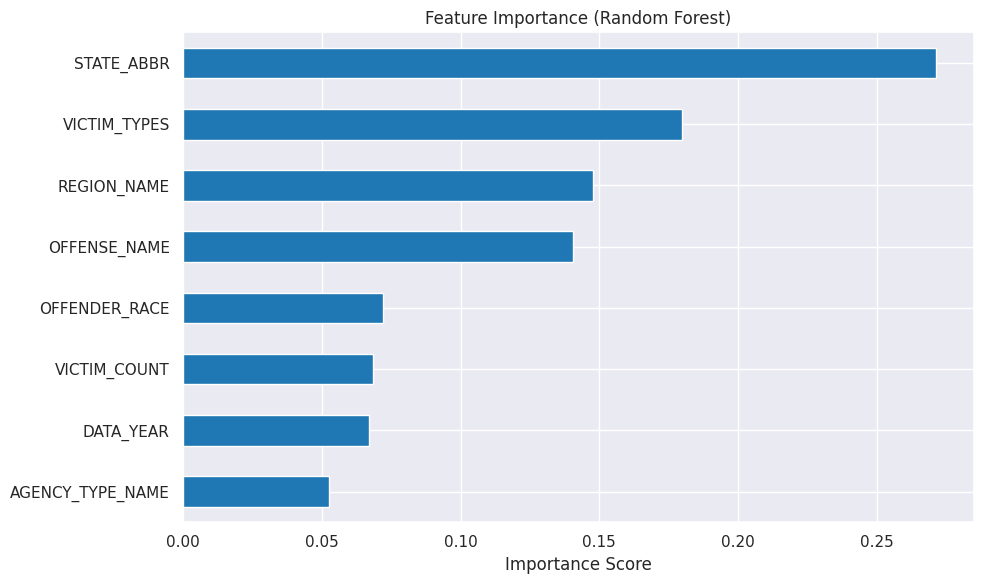

In [35]:
#target
target_col = 'LOCATION_NAME'

#top 5 most frequent location names
top_locations = cleaned[target_col].value_counts().nlargest(5).index
cleaned = cleaned[cleaned[target_col].isin(top_locations)]

# features
feature_cols = ['OFFENSE_NAME', 'REGION_NAME', 'DATA_YEAR', 'AGENCY_TYPE_NAME',
                'VICTIM_TYPES', 'OFFENDER_RACE', 'STATE_ABBR', 'VICTIM_COUNT']
cleaned = cleaned[feature_cols + [target_col]].dropna()

# Encode categorical variables
X = cleaned[feature_cols].apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(cleaned[target_col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=feature_cols)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

# XGboost

XGBoost Accuracy: 0.56

Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.47      0.48      3102
           1       0.75      0.55      0.63      1848
           2       0.32      0.02      0.04      1066
           3       0.56      0.79      0.65      5128
           4       0.55      0.27      0.37       924

    accuracy                           0.56     12068
   macro avg       0.53      0.42      0.43     12068
weighted avg       0.55      0.56      0.53     12068



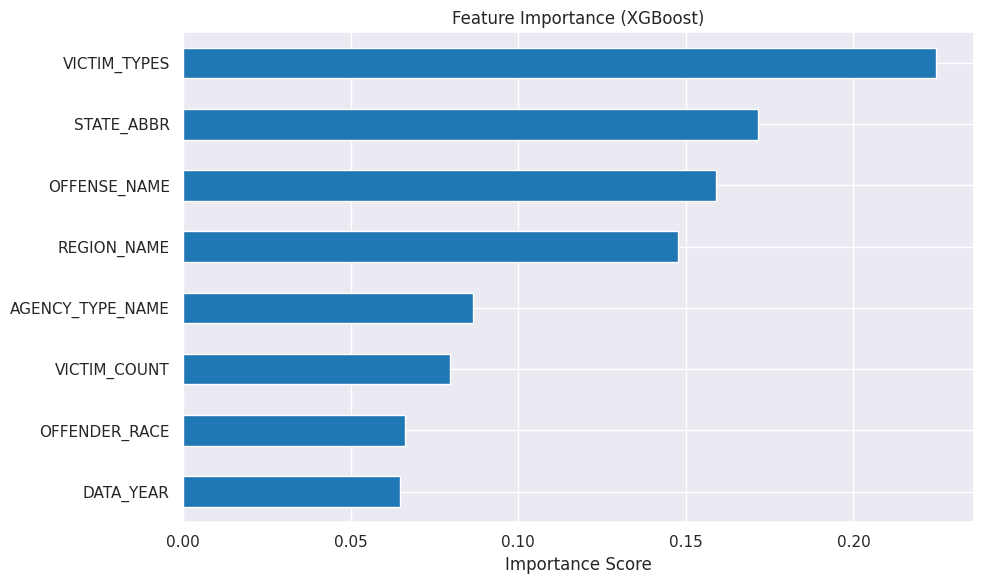

In [62]:
import warnings
warnings.filterwarnings("ignore")

# Target
target_col = 'LOCATION_NAME'

# top 5 most frequent location names
top_locations = cleaned[target_col].value_counts().nlargest(5).index
cleaned = cleaned[cleaned[target_col].isin(top_locations)]

# Define features
feature_cols = ['OFFENSE_NAME', 'REGION_NAME', 'DATA_YEAR', 'AGENCY_TYPE_NAME',
                'VICTIM_TYPES', 'OFFENDER_RACE', 'STATE_ABBR', 'VICTIM_COUNT']

# Drop missing values
cleaned = cleaned[feature_cols + [target_col]].dropna()

# Encode categorical variables
X = cleaned[feature_cols].apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(cleaned[target_col])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost Classifier
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,  # XGBoost handles encoding internally
    eval_metric='mlogloss',  # Use a suitable evaluation metric
    random_state=42
)
xgb.fit(X_train, y_train)

# Predict and evaluate
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Plot feature importances
importances = pd.Series(xgb.feature_importances_, index=feature_cols)
importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()